# KNN with scikit-learn - Lab

## Introduction

In this lab, you'll learn how to use scikit-learn's implementation of a KNN classifier on the classic Titanic dataset from Kaggle!
 

## Objectives

In this lab you will:

- Conduct a parameter search to find the optimal value for K 
- Use a KNN classifier to generate predictions on a real-world dataset 
- Evaluate the performance of a KNN model  


## Getting Started

Start by importing the dataset, stored in the `titanic.csv` file, and previewing it.

In [1]:
# Your code here
# Import pandas and set the standard alias 
import numpy as np
import pandas as pd

# Import the data from 'titanic.csv' and store it in a pandas DataFrame 
raw_df = pd.read_csv('titanic.csv')

# Print the head of the DataFrame to ensure everything loaded correctly 
raw_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Great!  Next, you'll perform some preprocessing steps such as removing unnecessary columns and normalizing features.

## Preprocessing the data

Preprocessing is an essential component in any data science pipeline. It's not always the most glamorous task as might be an engaging data visual or impressive neural network, but cleaning and normalizing raw datasets is very essential to produce useful and insightful datasets that form the backbone of all data powered projects. This can include changing column types, as in: 


```python
df['col_name'] = df['col_name'].astype('int')
```
Or extracting subsets of information, such as: 

```python
import re
df['street'] = df['address'].map(lambda x: re.findall('(.*)?\n', x)[0])
```

> **Note:** While outside the scope of this particular lesson, **regular expressions** (mentioned above) are powerful tools for pattern matching! See the [regular expressions official documentation here](https://docs.python.org/3.6/library/re.html). 

Since you've done this before, you should be able to do this quite well yourself without much hand holding by now. In the cells below, complete the following steps:

1. Remove unnecessary columns (`'PassengerId'`, `'Name'`, `'Ticket'`, and `'Cabin'`) 
2. Convert `'Sex'` to a binary encoding, where female is `0` and male is `1` 
3. Detect and deal with any missing values in the dataset:  
    * For `'Age'`, replace missing values with the median age for the dataset  
    * For `'Embarked'`, drop the rows that contain missing values
4. One-hot encode categorical columns such as `'Embarked'` 
5. Store the target column, `'Survived'`, in a separate variable and remove it from the DataFrame  

In [3]:
# Drop the unnecessary columns
df = raw_df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [4]:
df.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [5]:
# Convert Sex to binary encoding
from sklearn.preprocessing import FunctionTransformer

encoder_func = lambda x: 1 if x == 'male' else 0
encoder_func = np.vectorize(encoder_func)
encoder = FunctionTransformer(encoder_func, validate=False)
df['Sex'] = encoder.fit_transform(df.Sex)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,S
1,1,1,0,38.0,1,0,71.2833,C
2,1,3,0,26.0,0,0,7.9250,S
3,1,1,0,35.0,1,0,53.1000,S
4,0,3,1,35.0,0,0,8.0500,S


In [36]:
df.corr()[np.abs(df.corr()) < 0.1]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
Survived,NaN,NaN,NaN,-0.069822,-0.034040,0.083151,NaN
Pclass,NaN,NaN,NaN,NaN,0.081656,0.016824,NaN
Sex,NaN,NaN,NaN,0.086506,NaN,NaN,NaN
Age,-0.069822,NaN,0.086506,NaN,NaN,NaN,0.093707
SibSp,-0.034040,0.081656,NaN,NaN,NaN,NaN,NaN
Parch,0.083151,0.016824,NaN,NaN,NaN,NaN,NaN
Fare,NaN,NaN,NaN,0.093707,NaN,NaN,NaN


In [6]:
# Find the number of missing values in each column
df.info()

# 'Age' and 'Embarked' have missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(5), object(1)
memory usage: 55.8+ KB


In [7]:
df.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.647587,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,0.477990,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,1.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,1.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200


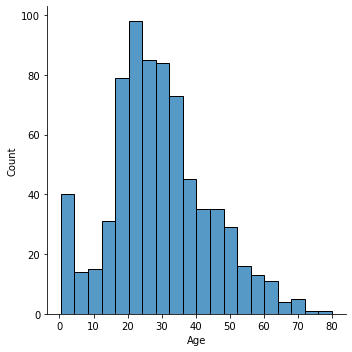

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.displot(df.Age);

In [9]:
# Impute the missing values in 'Age' 
# with the median of df['Age']
df['Age'] = df.Age.fillna(value=df.Age.median())
df.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [10]:
# Drop the rows missing values in the 'Embarked' column
df = df.dropna(subset=['Embarked'])
# reset index after dropping na in 'Embarked'
df.reset_index(drop=True, inplace=True)
df.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [37]:
# Treating 'Pclass' as categorical
df.Pclass.value_counts()

3    491
1    214
2    184
Name: Pclass, dtype: int64

In [11]:
df.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [12]:
from sklearn.preprocessing import OneHotEncoder

In [38]:
# One-hot encode the categorical columns
ohe = OneHotEncoder(drop='first')
encoded_cat = ohe.fit_transform(df[['Pclass', 'Embarked']])
col_names = ohe.get_feature_names(['Pclass', 'Embarked'])
ohe_df = pd.DataFrame(encoded_cat.todense(), columns=col_names)

In [39]:
df_cont = df.drop(['Embarked', 'Pclass'], axis=1)

In [40]:
df_cont.index

RangeIndex(start=0, stop=889, step=1)

In [41]:
one_hot_df = pd.concat([df_cont, ohe_df], axis=1)
one_hot_df.shape

(889, 10)

In [42]:
# Assign the 'Survived' column to labels
labels = df.Survived

# Drop the 'Survived' column from one_hot_df
X = one_hot_df.drop('Survived', axis=1)

In [43]:
labels.shape

(889,)

In [44]:
one_hot_df.head()

,Survived,Sex,Age,SibSp,Parch,Fare,Pclass_2,Pclass_3,Embarked_Q,Embarked_S
0,0,1,22.0,1,0,7.2500,0.0,1.0,0.0,1.0
1,1,0,38.0,1,0,71.2833,0.0,0.0,0.0,0.0
2,1,0,26.0,0,0,7.9250,0.0,1.0,0.0,1.0
3,1,0,35.0,1,0,53.1000,0.0,0.0,0.0,1.0
4,0,1,35.0,0,0,8.0500,0.0,1.0,0.0,1.0


## Create training and test sets

Now that you've preprocessed the data, it's time to split it into training and test sets. 

In the cell below:

* Import `train_test_split` from the `sklearn.model_selection` module 
* Use `train_test_split()` to split the data into training and test sets, with a `test_size` of `0.25`. Set the `random_state` to 42 

In [45]:
# Import train_test_split 
from sklearn.model_selection import train_test_split

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, labels, random_state=42)

## Normalizing the data

The final step in your preprocessing efforts for this lab is to **_normalize_** the data. We normalize **after** splitting our data into training and test sets. This is to avoid information "leaking" from our test set into our training set (read more about data leakage [here](https://machinelearningmastery.com/data-leakage-machine-learning/) ). Remember that normalization (also sometimes called **_Standardization_** or **_Scaling_**) means making sure that all of your data is represented at the same scale. The most common way to do this is to convert all numerical values to z-scores. 

Since KNN is a distance-based classifier, if data is in different scales, then larger scaled features have a larger impact on the distance between points.

To scale your data, use `StandardScaler` found in the `sklearn.preprocessing` module. 

In the cell below:

* Import and instantiate `StandardScaler` 
* Use the scaler's `.fit_transform()` method to create a scaled version of the training dataset  
* Use the scaler's `.transform()` method to create a scaled version of the test dataset  
* The result returned by `.fit_transform()` and `.transform()` methods will be numpy arrays, not a pandas DataFrame. Create a new pandas DataFrame out of this object called `scaled_df`. To set the column names back to their original state, set the `columns` parameter to `one_hot_df.columns` 
* Print the head of `scaled_df` to ensure everything worked correctly 

In [46]:
# Import StandardScaler
from sklearn.preprocessing import StandardScaler

# Instantiate StandardScaler
scaler = StandardScaler()

# Transform the training and test sets
scaled_data_train = scaler.fit_transform(X_train)
scaled_data_test = scaler.transform(X_test)

# Convert into a DataFrame
scaled_df_train = pd.DataFrame(scaled_data_train, columns=X.columns)
scaled_df_train.head()

,Sex,Age,SibSp,Parch,Fare,Pclass_2,Pclass_3,Embarked_Q,Embarked_S
0,-1.390655,-0.575676,-0.474917,-0.480663,-0.500108,-0.506561,0.889001,-0.311768,0.620174
1,-1.390655,1.550175,-0.474917,-0.480663,-0.435393,1.974097,-1.124858,-0.311768,0.620174
2,0.719086,-0.120137,-0.474917,-0.480663,-0.644473,1.974097,-1.124858,-0.311768,0.620174
3,0.719086,-0.120137,-0.474917,-0.480663,-0.115799,-0.506561,-1.124858,-0.311768,0.620174
4,-1.390655,-1.107139,0.413551,-0.480663,-0.356656,-0.506561,0.889001,-0.311768,-1.612452


You may have noticed that the scaler also scaled our binary/one-hot encoded columns, too! Although it doesn't look as pretty, this has no negative effect on the model. Each 1 and 0 have been replaced with corresponding decimal values, but each binary column still only contains 2 values, meaning the overall information content of each column has not changed.

## Fit a KNN model

Now that you've preprocessed the data it's time to train a KNN classifier and validate its accuracy. 

In the cells below:

* Import `KNeighborsClassifier` from the `sklearn.neighbors` module 
* Instantiate the classifier. For now, you can just use the default parameters  
* Fit the classifier to the training data/labels
* Use the classifier to generate predictions on the test data. Store these predictions inside the variable `test_preds` 

In [47]:
# Import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

# Instantiate KNeighborsClassifier
clf = KNeighborsClassifier()

# Fit the classifier
clf.fit(X_train, y_train)

# Predict on the test set
test_preds = clf.predict(X_test)

## Evaluate the model

Now, in the cells below, import all the necessary evaluation metrics from `sklearn.metrics` and complete the `print_metrics()` function so that it prints out **_Precision, Recall, Accuracy, and F1-Score_** when given a set of `labels` (the true values) and `preds` (the models predictions). 

Finally, use `print_metrics()` to print the evaluation metrics for the test predictions stored in `test_preds`, and the corresponding labels in `y_test`. 

In [48]:
# Your code here 
# Import the necessary functions
from sklearn.metrics import (precision_score, recall_score, accuracy_score, f1_score)

In [49]:
# Complete the function
def print_metrics(labels, preds):
    print("Precision Score: {}".format(precision_score(y_test, test_preds)))
    print("Recall Score: {}".format(recall_score(y_test, test_preds)))
    print("Accuracy Score: {}".format(accuracy_score(y_test, test_preds)))
    print("F1 Score: {}".format(f1_score(y_test, test_preds)))
    
print_metrics(y_test, test_preds)

Precision Score: 0.6
Recall Score: 0.5487804878048781
Accuracy Score: 0.6995515695067265
F1 Score: 0.5732484076433121


> Interpret each of the metrics above, and explain what they tell you about your model's capabilities. If you had to pick one score to best describe the performance of the model, which would you choose? Explain your answer.

Write your answer below this line: 
________________________________________________________________________________

- Precision Score: 0.6 --> approx. 60% of the survivals that our model predicted are correct

- Recall Score: 0.5487804878048781 --> our model correctly predicted around 55% of the actual survival

- Accuracy Score: 0.6995515695067265 --> our model correctly predicted around 70% of the data points (including both dead and survived)

- F1 Score: 0.5732484076433121 --> Overall, the harmonic mean of precision and recall of our model is around 57%

## Improve model performance

While your overall model results should be better than random chance, they're probably mediocre at best given that you haven't tuned the model yet. For the remainder of this notebook, you'll focus on improving your model's performance. Remember that modeling is an **_iterative process_**, and developing a baseline out of the box model such as the one above is always a good start. 

First, try to find the optimal number of neighbors to use for the classifier. To do this, complete the `find_best_k()` function below to iterate over multiple values of K and find the value of K that returns the best overall performance. 

The function takes in six arguments:
* `X_train`
* `y_train`
* `X_test`
* `y_test`
* `min_k` (default is 1)
* `max_k` (default is 25)
    
> **Pseudocode Hint**:
1. Create two variables, `best_k` and `best_score`
1. Iterate through every **_odd number_** between `min_k` and `max_k + 1`. 
    1. For each iteration:
        1. Create a new `KNN` classifier, and set the `n_neighbors` parameter to the current value for k, as determined by the loop 
        1. Fit this classifier to the training data 
        1. Generate predictions for `X_test` using the fitted classifier 
        1. Calculate the **_F1-score_** for these predictions 
        1. Compare this F1-score to `best_score`. If better, update `best_score` and `best_k` 
1. Once all iterations are complete, print the best value for k and the F1-score it achieved 

In [62]:
def find_best_k(X_train, y_train, X_test, y_test, min_k=1, max_k=25):
    
    # initiate f1 score list
    f1s = []
    
    # iterate through every odd number btw min_k and (max_k + 1)
    ks = np.arange(min_k, (max_k+1), 2)
    
    for k in ks:
        knn = KNeighborsClassifier(n_neighbors=k)
        knn = knn.fit(X_train, y_train)
        y_hat_test = knn.predict(X_test)
        f1 = f1_score(y_test, y_hat_test)
        f1s.append(f1)
        
    best_score = max(f1s)
    best_k = ks[f1s.index(best_score)]
    
    print('Best F1 Score:', best_score)
    print('Best K value:', best_k)
    
    plt.plot(ks, f1s)
    plt.xlabel('K values')
    plt.ylabel('F1-Score');
    return best_score, best_k

Best F1 Score: 0.7482993197278912
Best K value: 25


(0.7482993197278912, 25)

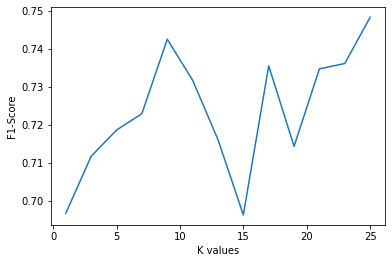

In [63]:
find_best_k(scaled_data_train, y_train, scaled_data_test, y_test)
# Expected Output:

# Best Value for k: 17
# F1-Score: 0.7468354430379746

In [ ]:
# It seems like we'll need to extend the range for k in order to find out 
# where f1-score starts to drop as k increases

Best F1 Score: 0.75
Best K value: 29


(0.75, 29)

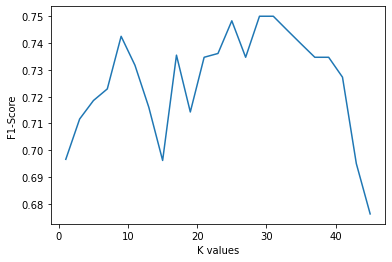

In [64]:
find_best_k(scaled_data_train, y_train, scaled_data_test, y_test, max_k=45)

If all went well, you'll notice that model performance has improved by 3 percent by finding an optimal value for k. For further tuning, you can use scikit-learn's built-in `GridSearch()` to perform a similar exhaustive check of hyperparameter combinations and fine tune model performance. For a full list of model parameters, see the [sklearn documentation !](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)



## (Optional) Level Up: Iterating on the data

As an optional (but recommended!) exercise, think about the decisions you made during the preprocessing steps that could have affected the overall model performance. For instance, you were asked to replace the missing age values with the column median. Could this have affected the overall performance? How might the model have fared if you had just dropped those rows, instead of using the column median? What if you reduced the data's dimensionality by ignoring some less important columns altogether?

In the cells below, revisit your preprocessing stage and see if you can improve the overall results of the classifier by doing things differently. Consider dropping certain columns, dealing with missing values differently, or using an alternative scaling function. Then see how these different preprocessing techniques affect the performance of the model. Remember that the `find_best_k()` function handles all of the fitting; use this to iterate quickly as you try different strategies for dealing with data preprocessing! 

In [65]:
# inspecting correlation within df
df.corr()[np.abs(df.corr()) < 0.1]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
Survived,NaN,NaN,NaN,-0.069822,-0.034040,0.083151,NaN
Pclass,NaN,NaN,NaN,NaN,0.081656,0.016824,NaN
Sex,NaN,NaN,NaN,0.086506,NaN,NaN,NaN
Age,-0.069822,NaN,0.086506,NaN,NaN,NaN,0.093707
SibSp,-0.034040,0.081656,NaN,NaN,NaN,NaN,NaN
Parch,0.083151,0.016824,NaN,NaN,NaN,NaN,NaN
Fare,NaN,NaN,NaN,0.093707,NaN,NaN,NaN


In [66]:
# 'SibSp' seems to have very little correlation with 'Survived', which is our target variable
# I'll epxlore with droppping SibSp to see if that will have any effect on our model performance

In [68]:
X2 = X.drop('SibSp', axis=1)

In [69]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X2, labels, random_state=42)

In [71]:
# Instantiate StandardScaler
scaler = StandardScaler()

# Transform the training and test sets
scaled_data_train = scaler.fit_transform(X_train)
scaled_data_test = scaler.transform(X_test)

# Convert into a DataFrame
scaled_df_train = pd.DataFrame(scaled_data_train, columns=X2.columns)
scaled_df_train.head()

,Sex,Age,Parch,Fare,Pclass_2,Pclass_3,Embarked_Q,Embarked_S
0,-1.390655,-0.575676,-0.480663,-0.500108,-0.506561,0.889001,-0.311768,0.620174
1,-1.390655,1.550175,-0.480663,-0.435393,1.974097,-1.124858,-0.311768,0.620174
2,0.719086,-0.120137,-0.480663,-0.644473,1.974097,-1.124858,-0.311768,0.620174
3,0.719086,-0.120137,-0.480663,-0.115799,-0.506561,-1.124858,-0.311768,0.620174
4,-1.390655,-1.107139,-0.480663,-0.356656,-0.506561,0.889001,-0.311768,-1.612452


Best F1 Score: 0.7448275862068966
Best K value: 23


(0.7448275862068966, 23)

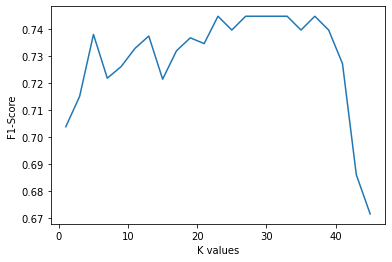

In [72]:
find_best_k(scaled_data_train, y_train, scaled_data_test, y_test, max_k=45)

In [ ]:
# So dropping 'SibSp' did not appear to improve our score.

### Experimenting with GridSearchCV

In [74]:
# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, labels, random_state=42)

# Instantiate StandardScaler
scaler = StandardScaler()

# Transform the training and test sets
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert into a DataFrame
scaled_df_train = pd.DataFrame(X_train, columns=X.columns)
scaled_df_train.head()

,Sex,Age,SibSp,Parch,Fare,Pclass_2,Pclass_3,Embarked_Q,Embarked_S
0,-1.390655,-0.575676,-0.474917,-0.480663,-0.500108,-0.506561,0.889001,-0.311768,0.620174
1,-1.390655,1.550175,-0.474917,-0.480663,-0.435393,1.974097,-1.124858,-0.311768,0.620174
2,0.719086,-0.120137,-0.474917,-0.480663,-0.644473,1.974097,-1.124858,-0.311768,0.620174
3,0.719086,-0.120137,-0.474917,-0.480663,-0.115799,-0.506561,-1.124858,-0.311768,0.620174
4,-1.390655,-1.107139,0.413551,-0.480663,-0.356656,-0.506561,0.889001,-0.311768,-1.612452


In [117]:
from sklearn.model_selection import GridSearchCV

grid_params = {
    # narrowing down k range to around the best k value found above
    'n_neighbors': np.arange(21, 32, 2),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

gs = GridSearchCV(
    KNeighborsClassifier(),
    grid_params,
    verbose = 1,
    scoring = 'f1'
)

gs_results = gs.fit(X_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed:    1.4s finished


In [118]:
gs_results.best_score_

0.766246886175854

In [119]:
gs_results.best_estimator_

KNeighborsClassifier(metric='manhattan', n_neighbors=27, weights='distance')

In [120]:
y_hat_test = gs.predict(X_test)
f1_score(y_test, y_hat_test)

0.7218934911242605

In [97]:
# The most optimal combination for KNN seems to be weighted Manhattan distance,
# and at a n_neighbors value of 27. 

# Current best F1-Score on testing data is 0.7218934911242605

Although the F1 score for the current best performing model using `GridSearchCV` is lower than F1 score obtained above, the second method for selecting best performing model is more accurate because we use cross validation (in `GridSearchCV`) to find the best performing model utilizing only training dataset, and select one that performs best on validation data (which is part of training data). Correct model selection method should not be using testing data to evaluate performance.

## Summary

Well done! In this lab, you worked with the classic Titanic dataset and practiced fitting and tuning KNN classification models using scikit-learn! As always, this gave you another opportunity to continue practicing your data wrangling skills and model tuning skills using Pandas and scikit-learn!